# Gutenberg-Richter

In [1]:
using CSV, Plots

## $N(M)=10^{a-bM}$

In [2]:
df = CSV.read("RawData.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:46
└ @ CSV /Users/sadeghi.ma/.julia/packages/CSV/UIgP3/src/CSV.jl:46


,Earthquake magnitude,number/per year
,String,Int64
1,>9.0,0
2,8~8.9,1
3,7~7.9,18
4,6~6.9,108
5,5~5.9,800
6,4~4.9,6200
7,3~3.9,49000
8,2~2.9,300000


## Data cleaning

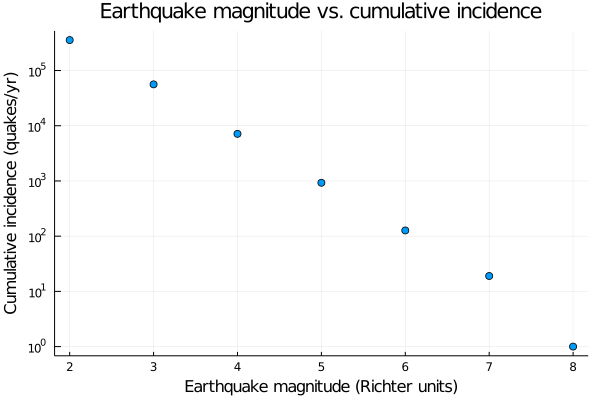

In [3]:
M = 2:8
N = [356127, 56127, 7127, 927, 127, 19, 1]

scatter(M,N, yaxis=:log, label=false,
    title  = "Earthquake magnitude vs. cumulative incidence",
    xlabel = "Earthquake magnitude (Richter units)",
    ylabel = "Cumulative incidence (quakes/yr)")

# Linear regression

In [4]:
function bparameter(M,N)
    x = M
    y = log10.(N)
    A      = zeros(2,2)       # Create A matrix
    A[1,1] = size(x,1)
    A[2,1] = sum(x)
    A[1,2] = A[2,1]
    A[2,2] = sum(x.*x)
    f      = zeros(2,1)       # Create A matrix
    f[1,1] = sum(y)
    f[2,1] = sum(y.*x)
    u = A\f
    a = u[1]
    b = -u[2]
    return [a,b]
end

bparameter(M,N)

2-element Array{Float64,1}:
 7.454894756377548
 0.9051697928240968

# Test

In [5]:
x = 1:10
y = exp.(log(10)*(4 .-5*x)) 
# answer should be a=4 and b=5
bparameter(x,y)

2-element Array{Float64,1}:
 4.0
 5.0

## Adjourn

In [6]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/April/2 16:09"